<a href="https://colab.research.google.com/github/Georgia-MAX-holic/R6_data_stduy/blob/main/R6_data_pandas_%20Final_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn



!pip install category_encoders

!pip install matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd
from scipy import stats
from numpy import mean
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    

from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline


import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
drive.mount('/content/drive')
filetitle = '/content/drive/My Drive/cpding/asdf/Game_data_EDA.csv'

df = pd.read_csv(filetitle)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pipe_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)   

In [ ]:
model = LinearRegression()
encoder = OneHotEncoder(use_cat_names= True)


In [ ]:
# 단순 선형 , 
def linear_model (X_train_name , y_train_name): 
  
    X_train = df[[X_train_name]]
    y_train = df[[y_train_name]]
    model.fit(X_train, y_train)

    y_pred = model.predict(df.loc[:, [X_train_name]])
  
    df["compare"].fillna(pd.Series(y_pred.flatten()), inplace=True) # compare ->  null 값 대체 가능

    return y_pred

# 열 삭제 
def del_coloum(column) :     
   df.drop(column,axis = 'columns')

   return df      


#다중선형 
def multi_linear (x1, x2 ,x3 ,y1):
   x = df[[x1,x2,x3]]
   y = df[[y1]]
   x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)
   model.fit(x_train, y_train)
   y_pred = model.predict(x_test)
   result=df['Null'].fillna(pd.Series(y_pred.flatten()), inplace=True)
   
   return result


# 결정트리
#def show_tree(tree, colnames):
#    dot = export_graphviz(tree, feature_names=colnames, filled=True, rounded=True)   
#    return graphviz.Source(dot)





# 랜덤 포레스트를 위한 원핫 인코딩 
def onehot_Random_tree (X,Y,number, name):

   HOT_df=encoder.fit_transform(df[X])
   
   x_Genre = HOT_df[list(HOT_df.columns)]

   y_Global_Sales = df[[Y]].astype(int)

   return R_forest_show_chart(x_Genre, y_Global_Sales ,number , name)

#랜덤 포레스트 차트 출력 
def R_forest_show_chart (x, y, number , name):
    %%time
    n = number  # 차트에 몇개 출력할지 
    x_train, x_test, y_train, y_test = train_test_split(x ,y, train_size = 0.7, test_size = 0.3) 

    pipe_ord.fit(x_train, y_train) # pipe 사용 
    


    enc = pipe_ord.named_steps['ordinalencoder']   #파이프 안의 ordinal 사용 
  
    encoded = enc.transform(x_train)
 

    rf_ord = pipe_ord.named_steps['randomforestclassifier']  
    importances_ord = pd.Series(rf_ord.feature_importances_, x_train.columns) # pd.Series , key값이 없는 순서형 자료형 
 
    plt.figure(figsize=(10,n/4))

    plt.title(f'Top {n} features with ordinalencoder {name}')

    print('Ordinal shape: ', encoded.shape)
    print('검증 정확도', pipe_ord.score(x_test, y_test))

    return importances_ord.sort_values()[-n:].plot.barh();


In [ ]:

stats.ttest_ind(df["NA_Sales"],df["EU_Sales"]) 
# 지역끼리 선호하는 장르는 크게 다르지 않음 / 선호하는 장르가 달랐다면 P-value 값에 어느정도 차이가 났을것

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
df_visual=df[["Name","Global_Sales"]]
df_visual.set_index('Name', inplace = True)

will=df_visual.idxmax(axis=0, skipna=True)
print(will)
df.loc [[0], :]

#가장 많이 팔린 제품은 Will sports

Global_Sales    Wii Sports
dtype: object


,Unnamed: 0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Null,Critic_Score,Critic_Count,User_Score,User_Count,Unnamed: 17,Rating
0,0.0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,7.100168,76.0,51.0,8,322.0,NaN,E


세계에서 가장 많이 팔린 TOP5

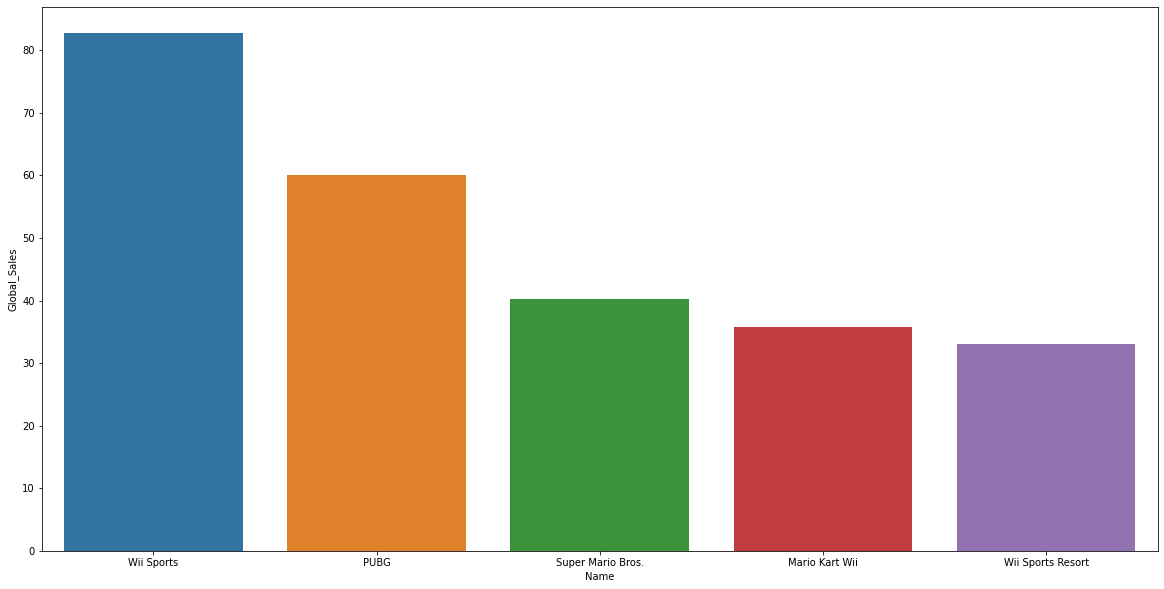

In [ ]:
top5_visual=df.loc [[0,1,2,3,5,6]]
plt.figure(figsize=(20,10))
sns.barplot(x='Name', y='Global_Sales', data=top5_visual) 

가장 많은 게임을 가진 플랫폼 

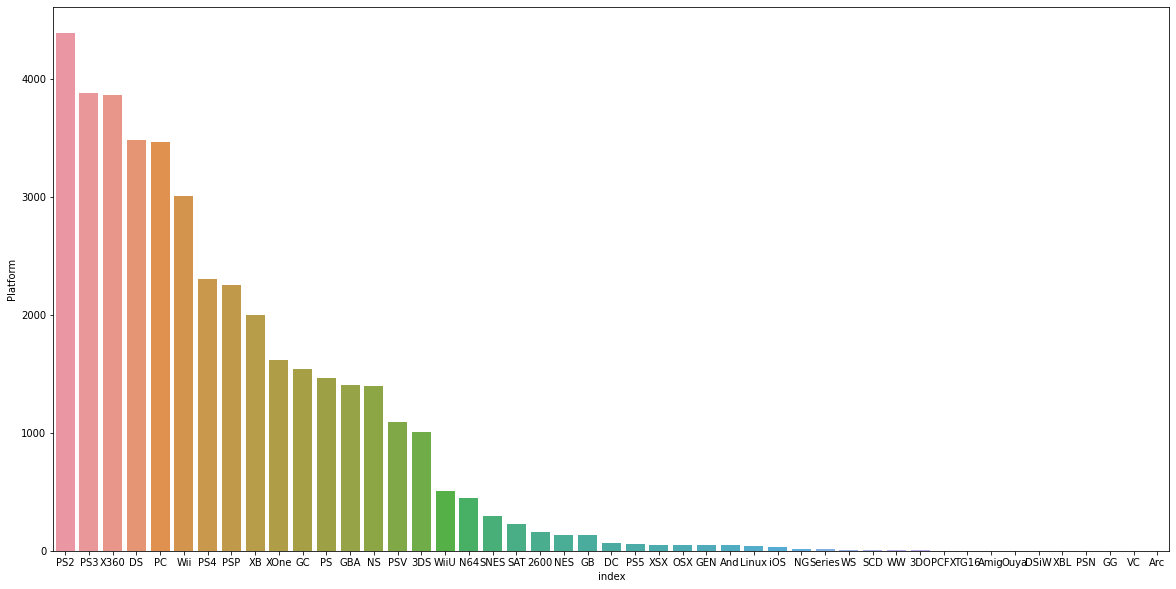

In [ ]:

console_df=pd.DataFrame(df["Platform"].value_counts()).reset_index()
plt.figure(figsize=(20,10))

sns.barplot(x=console_df["index"], y=console_df["Platform"], data=console_df) 


게임 보유 플랫폼 비율

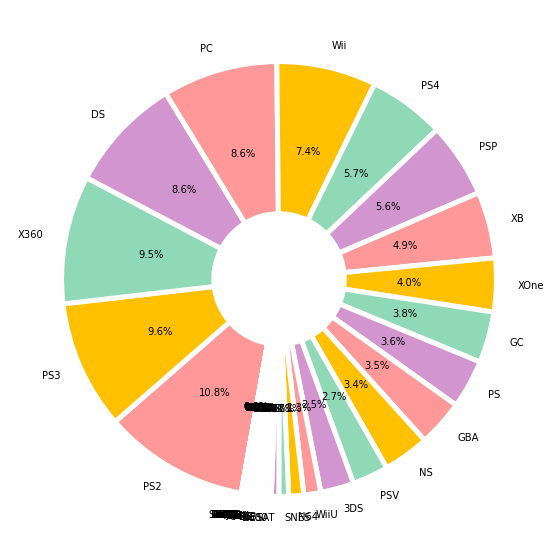

In [ ]:
plt.figure(figsize=(20,10))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(console_df["Platform"], labels=console_df["index"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [ ]:
연도별 데이터량 정리

In [ ]:

release_date_sale =  df.groupby('Year')['Global_Sales'].sum().reset_index()
release_date_sale = release_date_sale.drop([0])
# Total Game Sales by release_date

visual = go.Figure(go.Bar(x=release_date_sale['Year'],y=release_date_sale['Global_Sales'],marker={'color': release_date_sale['Global_Sales'],'colorscale': 'Viridis'}))
visual.update_layout(title_text='Gloval Sales',xaxis_title="Genre 	",yaxis_title="Sum of Sales")
visual.show()

예상값보다 많이 팔린 장르들 수집, -> 이러한 장르들을 좋아하는 경향이 있음 .

In [ ]:

df=df[["Name","Year","Platform","Genre","Publisher","NA_Sales","JP_Sales","EU_Sales","Other_Sales","Global_Sales"]].dropna()
df["compare"] =  np.nan    #compare 를 nan 값으로 

In [ ]:



linear_model ("NA_Sales" , "JP_Sales") # NA 모델을 기준으로 JP 모델을 추정 

df["find"]=df["compare"]<df["JP_Sales"]

df_find=df[["Name","Platform","Genre","Publisher","JP_Sales","compare","find"]]

df_True = df_find[df_find["find"]==True]

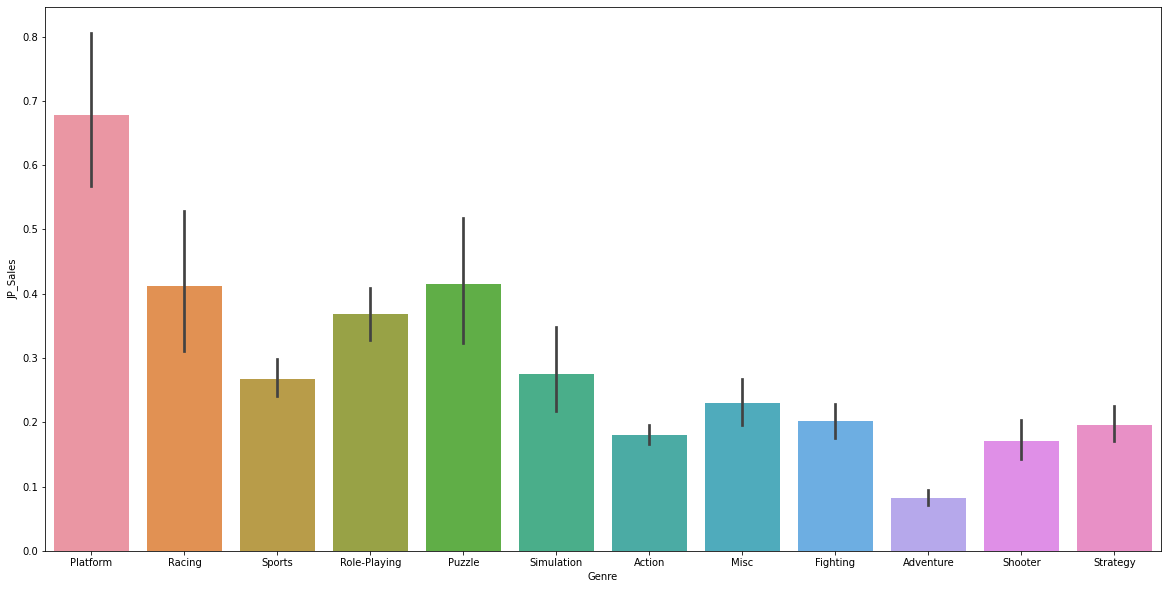

In [ ]:

find_df=pd.DataFrame(df_True["Genre"].value_counts()).reset_index()
plt.figure(figsize=(20,10))

sns.barplot(x=df_True["Genre"], y=df_True["JP_Sales"], data=df_True) 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

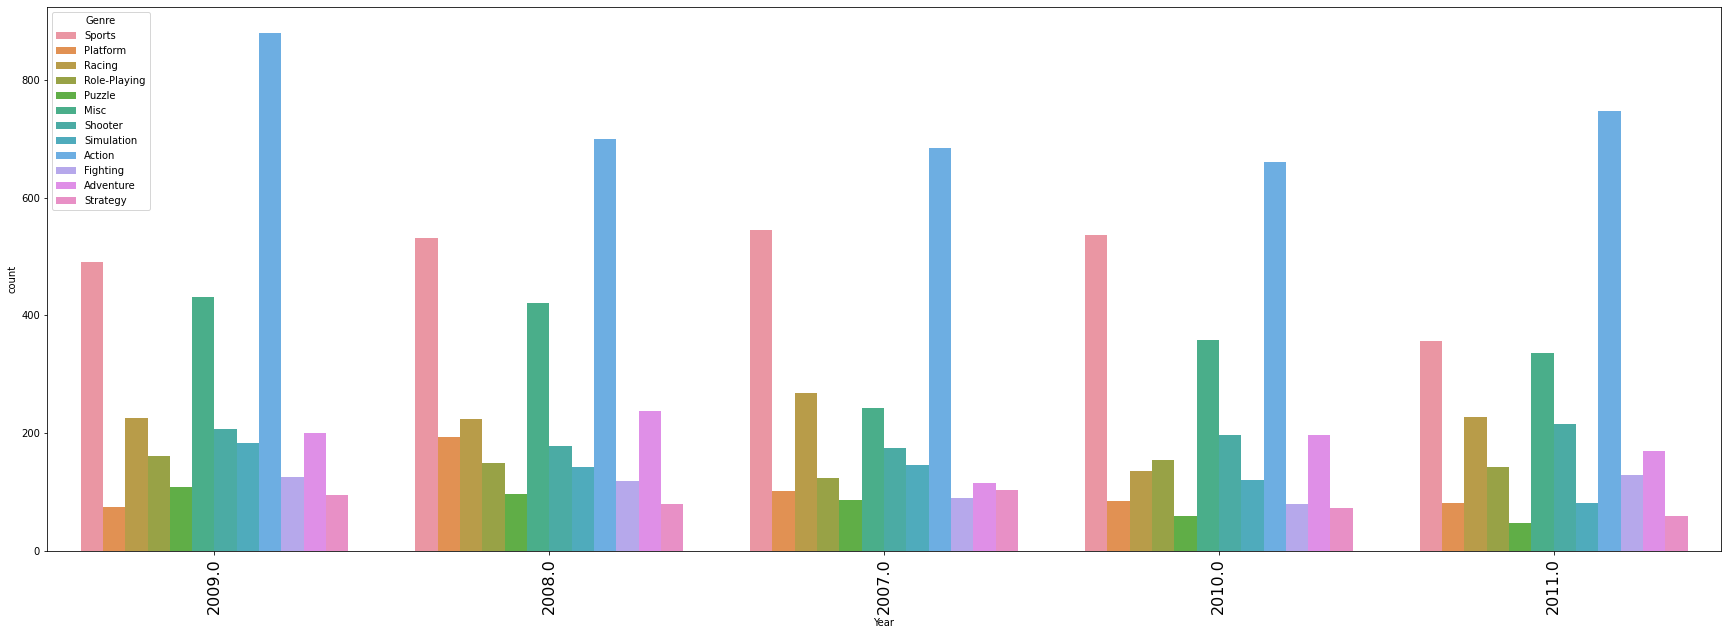

In [ ]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=df, hue='Genre', order=df.Year.value_counts().iloc[:5].index)
plt.xticks(size=16, rotation=90)

In [ ]:
graph_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

comp_map = graph_genre.groupby(by=['Genre']).sum()

comp_table = comp_map.reset_index()

comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')

comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,2721.48
1,Adventure,NA_Sales,181.02
2,Fighting,NA_Sales,476.38
3,Misc,NA_Sales,926.22
4,Platform,NA_Sales,808.25


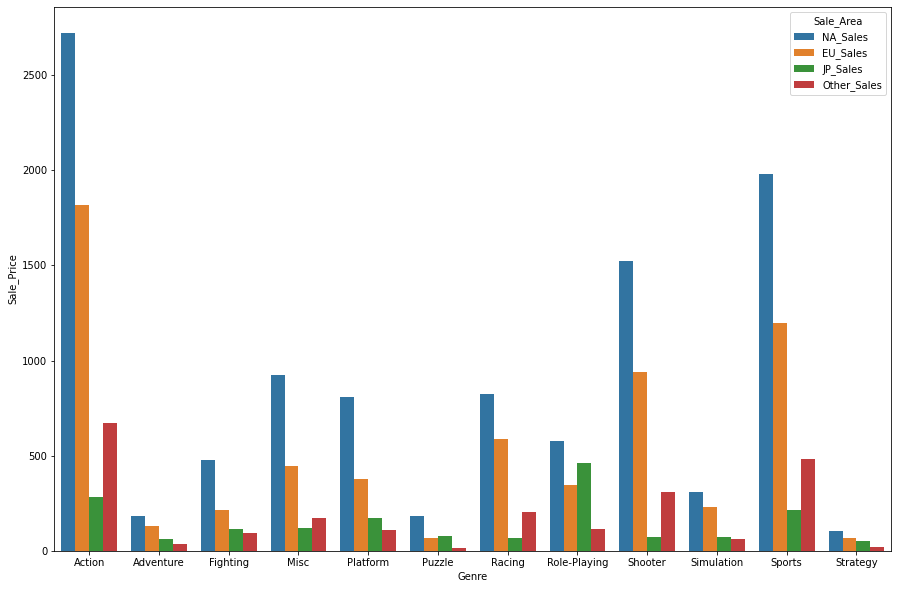

In [ ]:


plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



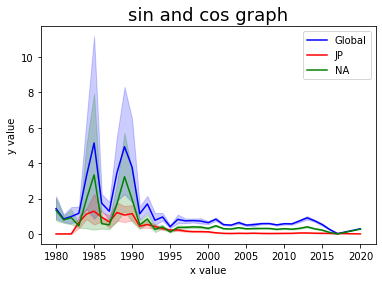

In [ ]:
x = df["Year"]
y_1 = df["Global_Sales"]
y_2 = df["JP_Sales"]
y_3 = df["NA_Sales"]
y_4 = df["EU_Sales"]
sns.lineplot(x, y_1,label='Global', color='blue' ) # label 설정값을 legend에 나타날 수 있음
sns.lineplot(x, y_2, label='JP', color='red')
sns.lineplot(x, y_3, label= "NA", color='green')
plt.xlabel("x value")
plt.ylabel("y value")

plt.title("sin and cos graph", fontsize = 18)

plt.show()

In [ ]:
df=df.drop(["find"], axis=1)

In [ ]:
HOT_df_Genre=HOT_df=encoder.fit_transform(df["Platform"])

각 지역별 매출에 실질적으로 기여한 플랫폼들

-> PS2 는 게임을 많이 만들었지만 별로 인기는 없었다.

-> 일본의 판매량은 대부분  패미컴 (NES)가 기여하였다.

-> NA X360 이 차지 

-> EU는 PS4가 차지 

-> 이로써 알수있는것은 콘솔 게임의 인기는 일본- > 미국 -> 유럽 순으로 인기가 있었다는것 추측 가능 

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 31)
검증 정확도 0.8512716371724205
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 31)
검증 정확도 0.9907165651290978
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 31)
검증 정확도 0.9366598974954067
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 31)
검증 정확도 0.9649937143409728


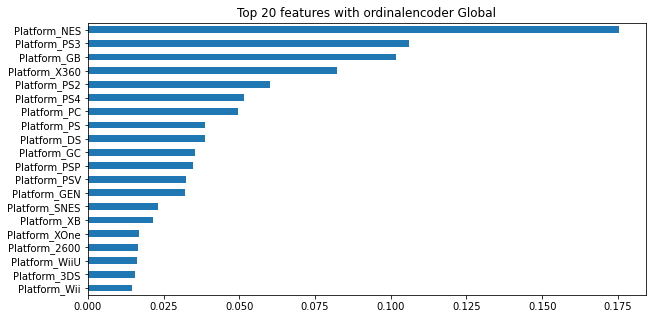

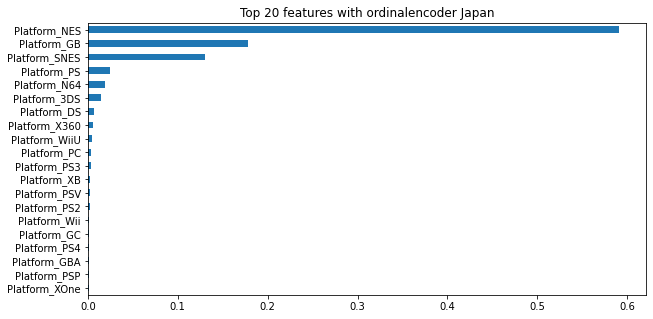

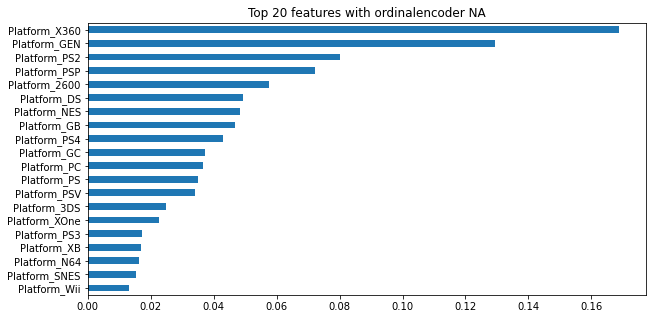

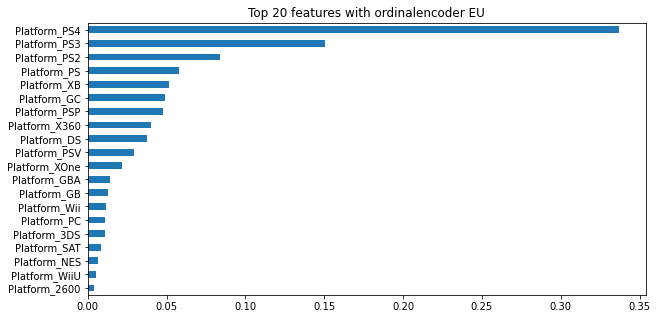

In [ ]:
onehot_Random_tree ("Platform","Global_Sales", 20, "Global")
#PS2는 게임 많이 만들었지만 쓸모는 없었다 .

#세계 총 매출에 어떤 플랫폼이 가장 기여를 하였는지 

# 일본 판매량의 플랫폼 관여성, -> 패미컴이
onehot_Random_tree ("Platform","JP_Sales", 20 , "Japan")
onehot_Random_tree ("Platform","NA_Sales", 20, "NA")
onehot_Random_tree ("Platform","EU_Sales", 20, "EU")

글로벌 매출에 가장 영향을 미친 장르는 어드밴쳐 

->JP 최고 매출 롤 플레잉 

-> NA는 슈터 

-> EU 슈터 


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 12)
검증 정확도 0.85175514940528
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 12)
검증 정확도 0.9907165651290978
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 12)
검증 정확도 0.9346291461173968
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Ordinal shape:  (24129, 12)
검증 정확도 0.9650904167875447


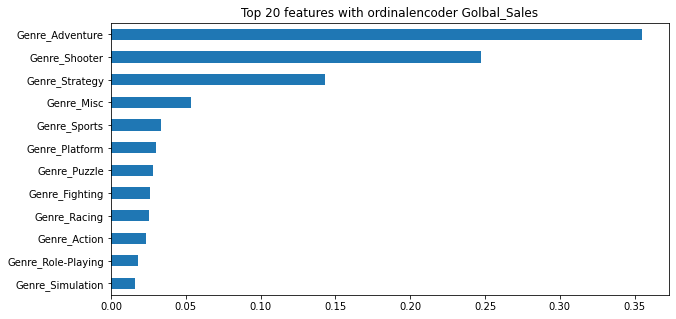

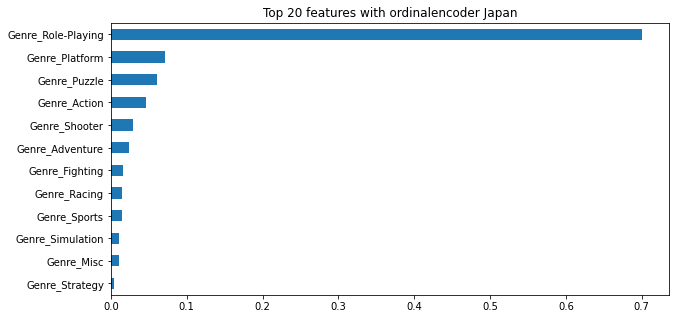

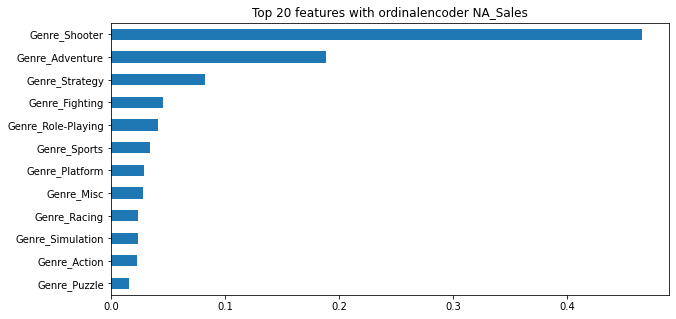

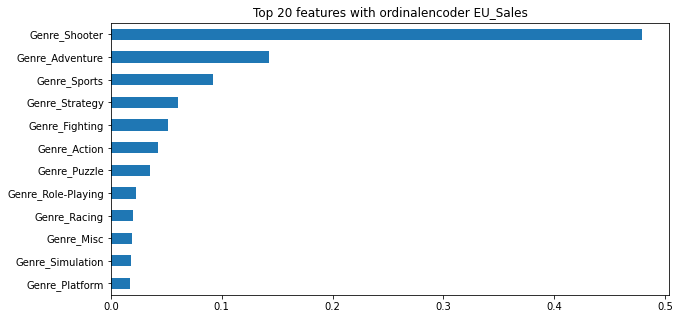

In [ ]:

#HOT_df_Genre=HOT_df=encoder.fit_transform(df["Genre"])
onehot_Random_tree ("Genre","Global_Sales",20, "Golbal_Sales")
onehot_Random_tree ("Genre","JP_Sales",20, "Japan")
onehot_Random_tree ("Genre","NA_Sales",20 ,"NA_Sales")
onehot_Random_tree ("Genre","EU_Sales",20 ,"EU_Sales")
#세계 매출에 가장 기여한 장르


In [ ]:
#df_ori=df_ori[df_ori["Genre"]=="Role-Playing"]


df_ori=df_ori[["NA_Sales" ,	"EU_Sales", 	'JP_Sales', 	"Other_Sales"]].dropna()


#y_Global_Sales = df[[Y]].astype(int)


In [ ]:


X= df[["NA_Sales" ,	"EU_Sales", 	'JP_Sales', 	"Other_Sales"]]
y= df["Global_Sales"].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cols = X_train.columns


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



Model accuracy score with linear kernel and C=100.0 : 0.9968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.



문제가 있다면 NA JP EU 등에서 이례적으로 성공한 케이스 

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5846    2    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  10  630    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    3  183    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   95    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   47    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   26    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0   18    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 